In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates[0]

(66.4504766522879, 44.12209535259083)

In [5]:
x=coordinates[0]
x[0]

66.4504766522879

---
# 6.1.5 Generate Random World Cities
---

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

---
# 6.2.6 Get the City Weather Data
---

#### Import Dependencies, and Initialize an Empty List and Counters

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kamenka
Processing Record 2 of Set 1 | tauranga
Processing Record 3 of Set 1 | hasaki
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | vao
Processing Record 6 of Set 1 | balaipungut
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | san jeronimo
Processing Record 10 of Set 1 | santa maria
Processing Record 11 of Set 1 | cabo san lucas
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | fortuna
Processing Record 14 of Set 1 | inongo
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | tual
Processing Record 19 of Set 1 | sorland
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | tuktoyak

Processing Record 40 of Set 4 | luderitz
Processing Record 41 of Set 4 | tymovskoye
Processing Record 42 of Set 4 | ampanihy
Processing Record 43 of Set 4 | fairbanks
Processing Record 44 of Set 4 | kargasok
Processing Record 45 of Set 4 | lerwick
Processing Record 46 of Set 4 | port hedland
Processing Record 47 of Set 4 | charters towers
Processing Record 48 of Set 4 | port blair
Processing Record 49 of Set 4 | portland
Processing Record 50 of Set 4 | melton
Processing Record 1 of Set 5 | pirapozinho
Processing Record 2 of Set 5 | olafsvik
Processing Record 3 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 5 | itarema
Processing Record 5 of Set 5 | nha trang
Processing Record 6 of Set 5 | naze
Processing Record 7 of Set 5 | kropotkin
Processing Record 8 of Set 5 | mogadishu
Processing Record 9 of Set 5 | lavrentiya
Processing Record 10 of Set 5 | antofagasta
Processing Record 11 of Set 5 | mareeba
Processing Record 12 of Set 5 | antipolo
Processing Recor

Processing Record 32 of Set 8 | carnarvon
Processing Record 33 of Set 8 | taoudenni
Processing Record 34 of Set 8 | kununurra
Processing Record 35 of Set 8 | taft
Processing Record 36 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 37 of Set 8 | pacific grove
Processing Record 38 of Set 8 | viedma
Processing Record 39 of Set 8 | bousso
Processing Record 40 of Set 8 | leningradskiy
Processing Record 41 of Set 8 | entre rios
Processing Record 42 of Set 8 | mar del plata
Processing Record 43 of Set 8 | ginir
Processing Record 44 of Set 8 | santa eulalia del rio
City not found. Skipping...
Processing Record 45 of Set 8 | shimoda
Processing Record 46 of Set 8 | boca do acre
Processing Record 47 of Set 8 | namibe
Processing Record 48 of Set 8 | bengkulu
Processing Record 49 of Set 8 | dunedin
Processing Record 50 of Set 8 | vilhena
Processing Record 1 of Set 9 | hirara
Processing Record 2 of Set 9 | kruisfontein
Processing Record 3 of Set 9 | kodinsk
Processing Record 4 of Set 9 | nag

Processing Record 21 of Set 12 | gacheta
Processing Record 22 of Set 12 | gornopravdinsk
Processing Record 23 of Set 12 | afanasyevo
City not found. Skipping...
Processing Record 24 of Set 12 | jinchengjiang
City not found. Skipping...
Processing Record 25 of Set 12 | ambalavao
Processing Record 26 of Set 12 | atasu
Processing Record 27 of Set 12 | parana
Processing Record 28 of Set 12 | taquaritinga
Processing Record 29 of Set 12 | inverell
Processing Record 30 of Set 12 | coihaique
Processing Record 31 of Set 12 | udachnyy
Processing Record 32 of Set 12 | bonfim
Processing Record 33 of Set 12 | umm lajj
Processing Record 34 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 35 of Set 12 | richards bay
Processing Record 36 of Set 12 | nador
Processing Record 37 of Set 12 | hayden
Processing Record 38 of Set 12 | evensk
Processing Record 39 of Set 12 | la ferte-bernard
Processing Record 40 of Set 12 | haines junction
Processing Record 41 of Set 12 | jalingo
Processing 

In [11]:
len(city_data)

567

In [12]:
city_data[432]

{'City': 'Loandjili',
 'Lat': -4.7561,
 'Lng': 11.8578,
 'Max Temp': 86,
 'Humidity': 74,
 'Cloudiness': 20,
 'Wind Speed': 11.5,
 'Country': 'CG',
 'Date': '2021-04-02 16:51:16'}

---
# 6.2.7 Create a DataFrame of City Weather Data
---

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kamenka,51.3223,42.7678,46.00,70,64,9.64,RU,2021-04-02 16:48:54
1,Tauranga,-37.6861,176.1667,61.00,75,100,1.99,NZ,2021-04-02 16:48:55
2,Hasaki,35.7333,140.8333,53.60,76,40,4.61,JP,2021-04-02 16:48:55
3,Punta Arenas,-53.1500,-70.9167,50.00,66,0,16.11,CL,2021-04-02 16:48:55
4,Vao,-22.6667,167.4833,74.25,89,100,30.36,NC,2021-04-02 16:48:56
5,Balaipungut,1.0500,101.2833,78.80,73,20,9.22,ID,2021-04-02 16:48:56
6,Saint-Philippe,-21.3585,55.7679,77.00,83,20,18.41,RE,2021-04-02 16:48:56
7,Ushuaia,-54.8000,-68.3000,50.00,71,40,4.61,AR,2021-04-02 16:48:57
8,San Jeronimo,-11.9472,-75.2829,56.98,63,99,1.59,PE,2021-04-02 16:48:57
9,Santa Maria,-29.6842,-53.8069,78.80,57,20,13.80,BR,2021-04-02 16:46:03


In [14]:
# Reorder columns
new_column_order = ['City','Country','Date','Lat','Lng',
                    'Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kamenka,RU,2021-04-02 16:48:54,51.3223,42.7678,46.00,70,64,9.64
1,Tauranga,NZ,2021-04-02 16:48:55,-37.6861,176.1667,61.00,75,100,1.99
2,Hasaki,JP,2021-04-02 16:48:55,35.7333,140.8333,53.60,76,40,4.61
3,Punta Arenas,CL,2021-04-02 16:48:55,-53.1500,-70.9167,50.00,66,0,16.11
4,Vao,NC,2021-04-02 16:48:56,-22.6667,167.4833,74.25,89,100,30.36
5,Balaipungut,ID,2021-04-02 16:48:56,1.0500,101.2833,78.80,73,20,9.22
6,Saint-Philippe,RE,2021-04-02 16:48:56,-21.3585,55.7679,77.00,83,20,18.41
7,Ushuaia,AR,2021-04-02 16:48:57,-54.8000,-68.3000,50.00,71,40,4.61
8,San Jeronimo,PE,2021-04-02 16:48:57,-11.9472,-75.2829,56.98,63,99,1.59
9,Santa Maria,BR,2021-04-02 16:46:03,-29.6842,-53.8069,78.80,57,20,13.80


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

---
# 6.3.1 Plot Latitude vs. Temperature
---

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

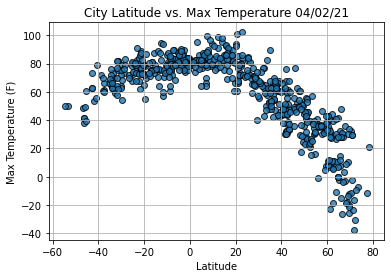

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

---
# 6.3.2 Plot Latitude vs. Humidity
---

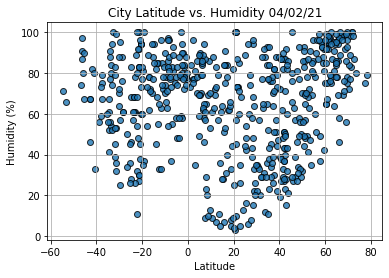

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

---
# 6.3.3 Plot Latitude vs. Cloudiness
---

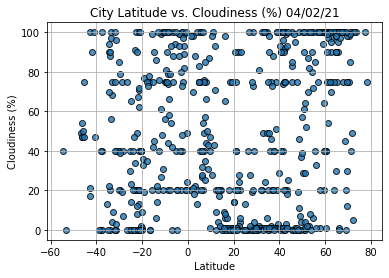

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

---
# 6.3.4 Plot Latitude vs. Wind Speed
---

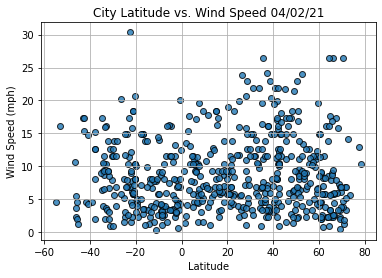

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()